In [1]:
import geopandas as gpd
import networkx as nx
import osmnx as ox
import overpy

%matplotlib inline
ox.__version__

'1.1.2'

- [x] OSMNx to check amenities of the buildings
- [ ] Building classification problem
- [ ] Accessing weather API
- [x] Test fbprophet with Austin data
- [ ] Explore Texas dataset

In [4]:
routes = gpd.read_file(open("data/Garbage Routes.geojson"))

In [4]:
api = overpy.Overpass()

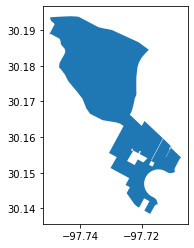

In [5]:
routes[(routes['garb_rt'] == 'PAM71') | (routes['rt_old'] == 'PAM71')].plot();

/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


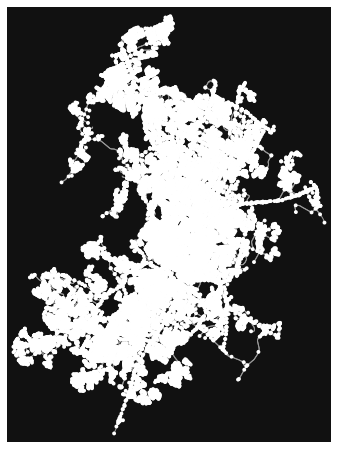

In [2]:
# ox.plot_graph(ox.graph_from_place('Austin, Texas, USA'))
G = ox.graph_from_place("Austin, Texas, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

In [15]:
def get_polygon(gdf: gpd.GeoDataFrame, rt:str):
    return gdf[(gdf['garb_rt'] == rt) | (routes['rt_old'] == rt)]['geometry'].iloc[0] 

polygon = get_polygon(routes, 'PAM71')

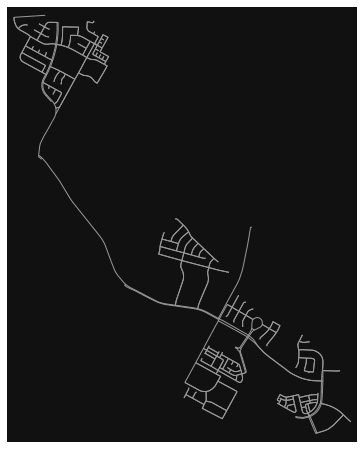

In [13]:
G_ = ox.graph_from_polygon(polygon, network_type="drive")
fig, ax = ox.plot_graph(G_, node_size=0)

In [26]:
# tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
tags = {"amenity": True}
# tags = {"landuse": ["retail", "commercial"]}
# tags = {"building": True}
gdf = ox.geometries_from_polygon(polygon, tags=tags)
gdf.shape

(76, 36)

In [27]:
gdf

addr:state       amenity  ele gnis:county_name  \
element_type osmid                                                       
node         368161148          TX  fire_station  186           Travis   
             368162210          TX       library  179           Travis   
             724493070         NaN       toilets  NaN              NaN   
             7189104196        NaN         bench  NaN              NaN   
             8400896305        NaN         bench  NaN              NaN   
...                            ...           ...  ...              ...   
way          904604020         NaN       parking  NaN              NaN   
             904604021         NaN       parking  NaN              NaN   
             904604022         NaN       parking  NaN              NaN   
             987845957         NaN        school  NaN              NaN   
relation     12284580          NaN       parking  NaN              NaN   

                        gnis:feature_id                      gnis:import_uuid  \
element_type osmid                                                              
node         368161148          2360673  57871b70-0100-4405-bb30-88b2e001a944   
             368162210          2360801  57871b70-0100-4405-bb30-88b2e001a944   
             724493070              NaN                                   NaN   
             7189104196             NaN                                   NaN   
             8400896305             NaN                                   NaN   
...                                 ...                                   ...   
way          904604020              NaN                                   NaN   
             904604021              NaN                                   NaN   
             904604022              NaN                                   NaN   
             987845957              NaN                                   NaN   
relation     12284580               NaN                                   NaN   

                        gnis:reviewed  \
element_type osmid                      
node         368161148             no   
             368162210             no   
             724493070            NaN   
             7189104196           NaN   
             8400896305           NaN   
...                               ...   
way          904604020            NaN   
             904604021            NaN   
             904604022            NaN   
             987845957            NaN   
relation     12284580             NaN   

                                                                name  \
element_type osmid                                                     
node         368161148                 Austin Fire Station Number 24   
             368162210   Southeast Austin Branch Austin City Library   
             724493070                                           NaN   
             7189104196                                          NaN   
             8400896305                                          NaN   
...                                                              ...   
way          904604020                                           NaN   
             904604021                                           NaN   
             904604022                                           NaN   
             987845957                   Hillcrest Elementary School   
relation     12284580                   Upper McKinney Falls Parking   

                                source  \
element_type osmid                       
node         368161148   USGS Geonames   
             368162210   USGS Geonames   
             724493070             NaN   
             7189104196            NaN   
             8400896305            NaN   
...                                ...   
way          904604020             NaN   
             904604021             NaN   
             904604022             NaN   
             987845957             NaN   
relation     12284580           

In [28]:
gdf.amenity.value_counts()

parking                  33
toilets                  10
shelter                   8
drinking_water            5
school                    4
bench                     3
shower                    3
fountain                  3
fire_station              1
library                   1
waste_disposal            1
waste_basket              1
sanitary_dump_station     1
community_centre          1
theatre                   1
Name: amenity, dtype: int64

# To Do
- [ ] Speficy the types of amenities and building classification from OSM. There are multiple ways to understand the requirement. For example using the [building tag](https://wiki.openstreetmap.org/wiki/Map_features#Building) or using [amenities tag](https://wiki.openstreetmap.org/wiki/Map_features#Amenity).
